<a href="https://www.kaggle.com/mickaelnarboni/ketodapp-cleaning?scriptVersionId=85437930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Context

We're going to work on the database of Open Food Facts that you can find here: https://world.openfoodfacts.org/

Open Food Facts is a non-profit project developed by thousands of volunteers from around the world made by everyone, for everyone.

The goal of this notebook is to have a better understanding of the data, clean our dataframe and propose an application based on our observations and exploratory manipulations.

# Notebook preparation

The current notebook has been written on Kaggle due to our low machine performance on Jupyter or Google Collab, explained by the file size which is over 4 Gb. Some of the basic operations such as reading the dataframe were taking a lot of time and was slowing us down in the process. 

We're starting by defining the various librairies that we're going to use in the notebook such as **pandas** to work on the dataframes, **numpy** for linear algebra operations, **matplotlib** for graphics on the missing values and univariable analysis 

Note that we've imported the **warnings librairy** in oder to ignore the warning message about the file size (currently over 4 GB) when reading the file.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/openfoodfacts/clean_p2.csv
/kaggle/input/openfoodfacts/en.openfoodfacts.org.products.csv


# Observations

We're starting by importing the file and put it into a dataframe using pandas library with the pd.read_csv() operation. 

**Note:**
* We're using **sep** to split the data by tabulation 
* **error_bad_lines** will drop the rows that are invalid (due to csv written mistakes in the file)
* The argument **low_memory** is used for better allocation of the RAM


We're then creating a new dataframe that is going to include a random 10% of the initial dataframe we previously imported that we call *sample10*.
To do so, we've used .sample() operation from pandas library using frac=0.1 argument to get 10% of the initial *raw_data*.

Next, to have an idea of the columns and rows we're treating here, we display the five first rows of the dataframe we just created using .head() operation.  


In [2]:
# import des données
raw_data = (pd.read_csv('../input/openfoodfacts/en.openfoodfacts.org.products.csv',sep='\t', error_bad_lines=False, low_memory=False))
sample10 = raw_data.sample(frac=0.1) 
# création d'un sample de 10% du dataset pour alléger la mémoire du notebook lors du nettoyage
sample10.head() # 5 premières colonnes et header

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
947309,3472710017574,http://world-en.openfoodfacts.org/product/3472...,kiliweb,1523213972,2018-04-08T18:59:32Z,1581201845,2020-02-08T22:44:05Z,truffes fantaisie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210453,4056489279440,http://world-en.openfoodfacts.org/product/4056...,kiliweb,1612511756,2021-02-05T07:55:56Z,1612511757,2021-02-05T07:55:57Z,Seasoning salt indian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137281,3770012013035,http://world-en.openfoodfacts.org/product/3770...,kiliweb,1594075786,2020-07-06T22:49:46Z,1628320462,2021-08-07T07:14:22Z,Chips artisanales,NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517688,7501791631495,http://world-en.openfoodfacts.org/product/7501...,openfoodfacts-contributors,1545435715,2018-12-21T23:41:55Z,1557519321,2019-05-10T20:15:21Z,Maple jarabe sabor,NaN,Jarabe sabor Maple,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183757,4015753185658,http://world-en.openfoodfacts.org/product/4015...,kiliweb,1554375410,2019-04-04T10:56:50Z,1563218557,2019-07-15T19:22:37Z,Boeuf hongroise + pates,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sample10.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.024860e+05,2.024860e+05,0.0,0.0,50415.000000,0.0,72914.000000,0.0,72914.000000,0.0,...,1176.000000,72633.000000,1.0,1.0,0.0,7.000000,142.000000,9.000000,8.000000,6.000000
mean,1.561434e+09,1.596499e+09,NaN,NaN,99.950488,NaN,2.033889,NaN,0.020531,NaN,...,600.848852,9.138890,22.0,44.0,NaN,0.103857,0.083203,4.355556,0.037250,0.011483
std,5.348016e+07,3.153897e+07,NaN,NaN,722.008583,NaN,2.887072,NaN,0.144016,NaN,...,843.397379,8.822902,NaN,NaN,NaN,0.051905,0.990225,1.745789,0.026337,0.005114
min,1.328973e+09,1.343573e+09,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,1.300000,-15.000000,22.0,44.0,NaN,0.042000,0.000000,2.200000,0.002000,0.007100
25%,1.524933e+09,1.583010e+09,NaN,NaN,28.000000,NaN,0.000000,NaN,0.000000,NaN,...,114.755000,2.000000,22.0,44.0,NaN,0.056500,0.000008,3.600000,0.021500,0.007600
50%,1.572343e+09,1.600895e+09,NaN,NaN,53.000000,NaN,1.000000,NaN,0.000000,NaN,...,354.810000,10.000000,22.0,44.0,NaN,0.116000,0.000021,4.000000,0.027000,0.009750
75%,1.605537e+09,1.620536e+09,NaN,NaN,114.000000,NaN,3.000000,NaN,0.000000,NaN,...,630.500000,16.000000,22.0,44.0,NaN,0.146000,0.000103,5.200000,0.059500,0.014000
max,1.636507e+09,1.636509e+09,NaN,NaN,100000.000000,NaN,33.000000,NaN,2.000000,NaN,...,4807.940000,40.000000,22.0,44.0,NaN,0.164000,11.800000,8.000000,0.080000,0.020000


In order to have a better idea of the quality of the data we're treating, we calculate the number of columns, rows, cells, missing values and percentage of missing values out of our dataframe.

To do so, we use basics arithmetics operations on our dataframe using pandas library such as:
* len() that is returning the size of the data
* .isna().sum().sum() returns the total missing valeus of the dataframe
* .format() that allows us to return a certain number of digit for the % of missing values

We can already notice that we have an overall **80% of missing values** that we will have to deal with.

In [4]:
print('number of columns:',len(sample10.columns)) # return the number of columns 
print('number of rows:',len(sample10)) # return the number of rows
print('number of cells:',len(sample10)*len(sample10.columns))# return the number of data 
print('number of missing values:',sample10.isna().sum().sum()) # return the number of total missing values
print('number of missing values in % : {:.2%}'.format((sample10.isna().sum().sum())/(len(sample10)*len(sample10.columns)))) # return the percentage of missing values




number of columns: 187
number of rows: 202486
number of cells: 37864882
number of missing values: 30306932
number of missing values in % : 80.04%


Now we want to dive in deeper in the understanding of the missing values. 
Therefore, we're creating a loop that is going to display for each column, the label, the dtype of the variables and the number of missing values.

To do so, we've used:
* .columns() operation that returns the labels of the columns
* .dtypes argument that is returning the type of the variables 
* isna() operation is returning a boolean of the missing value (either True or False) that we combine with .sum() operation to have to total number of each missing value (NaN) for each columns

In [5]:
for i in sample10.columns:
    print(i,'||',sample10[i].dtypes,'||', sample10[i].isna().sum(),'||','{:.2%}'.format((sample10.isna().sum()/len(sample10))[i])) 


code || object || 0 || 0.00%
url || object || 0 || 0.00%
creator || object || 0 || 0.00%
created_t || int64 || 0 || 0.00%
created_datetime || object || 0 || 0.00%
last_modified_t || int64 || 0 || 0.00%
last_modified_datetime || object || 0 || 0.00%
product_name || object || 8145 || 4.02%
abbreviated_product_name || object || 201758 || 99.64%
generic_name || object || 190316 || 93.99%
quantity || object || 151559 || 74.85%
packaging || object || 171091 || 84.50%
packaging_tags || object || 171094 || 84.50%
packaging_text || object || 201687 || 99.61%
brands || object || 98414 || 48.60%
brands_tags || object || 98421 || 48.61%
categories || object || 108652 || 53.66%
categories_tags || object || 108652 || 53.66%
categories_en || object || 108652 || 53.66%
origins || object || 193743 || 95.68%
origins_tags || object || 193758 || 95.69%
origins_en || object || 193758 || 95.69%
manufacturing_places || object || 189738 || 93.70%
manufacturing_places_tags || object || 189744 || 93.71%
labels 

Now, we want to insert the values above in a new dataframe so it will be easier for us to manipulate the data and use it for data visualization. 

In order to do so, we're using:
* .DataFrame() to create an empty dataframe in which we're going to add the columns we're interested in such as Product name, Data type, Missing values count, % Missing values



In [6]:
missing_data = pd.DataFrame()
missing_data['Column variable'] = sample10.columns
missing_data['Data type'] = list(sample10.dtypes)
missing_data['Missing values count'] = list(sample10.isna().sum())
missing_data['% Missing values'] = list((sample10.isna().sum()/len(sample10))) 
print(missing_data)

        Column variable Data type  Missing values count  % Missing values
0                  code    object                     0          0.000000
1                   url    object                     0          0.000000
2               creator    object                     0          0.000000
3             created_t     int64                     0          0.000000
4      created_datetime    object                     0          0.000000
..                  ...       ...                   ...               ...
182        choline_100g   float64                202479          0.999965
183  phylloquinone_100g   float64                202344          0.999299
184    beta-glucan_100g   float64                202477          0.999956
185       inositol_100g   float64                202478          0.999960
186      carnitine_100g   float64                202480          0.999970

[187 rows x 4 columns]


# Data Visualization for Missing Values

We're using the **matplotlib** library to display our graph of missing values.

In order to do so, we:
* Sort our Missing values using .sort_values() operation on our *missing_data* dataframe
* Display a figure using .figure()
* Give a comprehensive label to our axis and title

In the following graph, the **x axis** represents our Column variable axis and the **y axis** represents the % Missing values axis.
We've used various operations found in **matplotlib** library to design our graph.


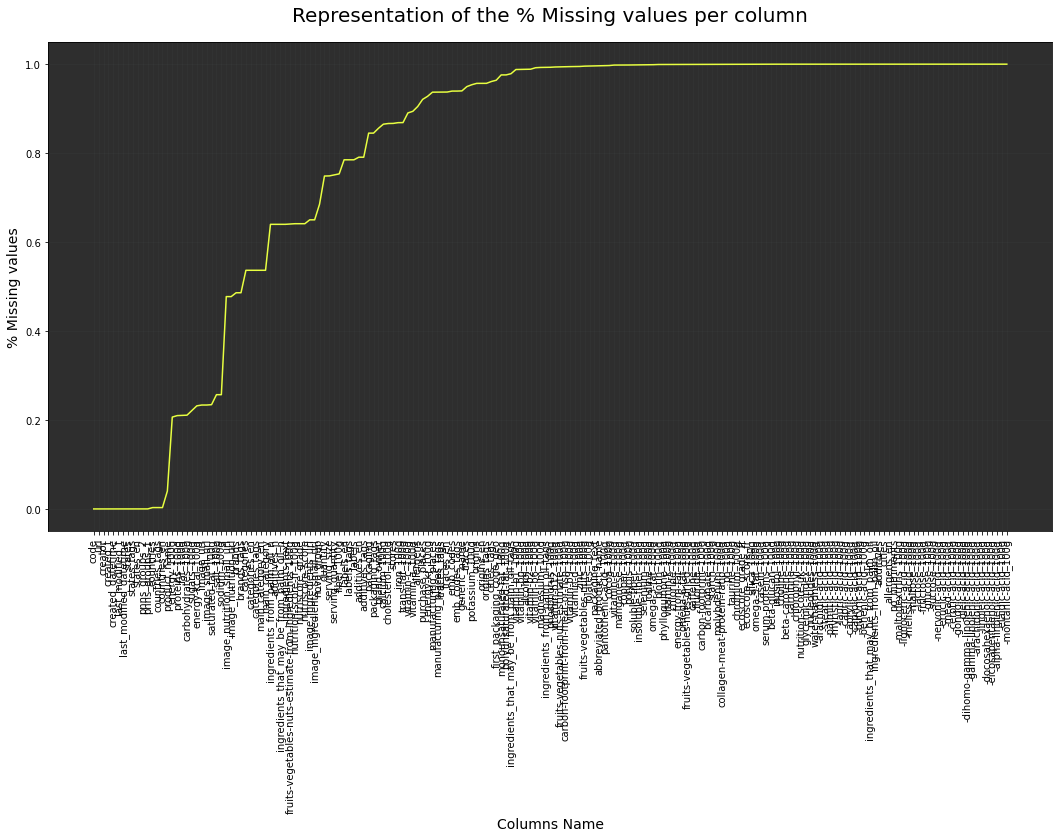

In [7]:
# data visualization for missing values of our dataframe called missing_data

to_plot = missing_data.sort_values(by=['% Missing values'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Representation of the % Missing values per column', fontsize=20, y=1.03)
plt.xlabel('Columns Name', fontsize=14)
plt.ylabel('% Missing values', fontsize=14)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot['Column variable'],to_plot['% Missing values'],color="#E8FF41"); 


# Decisions for Treating with Missing Values

It seems obvious that we don't need to work with columns that have 100% missing values.
It seems also smart to drop the columns that have missing values above a certain threshold. 
We define this threshold based on the variables we want to keep for our application later, which means: fat_per_100g, proteins_per_100g, carbohydrates_per_100g, countries, product_name.
We notice that the variables don't exceed 21% missing values but we're working on a sample so this number can have small fluctuations so we'll define 25% in case of variations in future samples.

To do so, we use:
* .dropna() in pandas library using the arguments **axis** to work on the columns and **thresh** to drop the columns that have more than 25% of missing values



In [8]:
data = sample10.dropna(axis=1, thresh= len(sample10)*0.75) 

# axis = 1 will drop columns with missing values, if 0, then it drops the rows by default

for i in data.columns:
    print(i,'||',data[i].dtypes,'||', data[i].isna().sum(),'||','{:.2%}'.format((sample10.isna().sum()/len(sample10))[i])) 
    
# Let's have a look at our new dataframe below


code || object || 0 || 0.00%
url || object || 0 || 0.00%
creator || object || 0 || 0.00%
created_t || int64 || 0 || 0.00%
created_datetime || object || 0 || 0.00%
last_modified_t || int64 || 0 || 0.00%
last_modified_datetime || object || 0 || 0.00%
product_name || object || 8145 || 4.02%
countries || object || 617 || 0.30%
countries_tags || object || 618 || 0.31%
countries_en || object || 618 || 0.31%
pnns_groups_1 || object || 13 || 0.01%
pnns_groups_2 || object || 12 || 0.01%
states || object || 0 || 0.00%
states_tags || object || 0 || 0.00%
states_en || object || 0 || 0.00%
image_url || object || 47304 || 23.36%
image_small_url || object || 47304 || 23.36%
energy-kcal_100g || float64 || 46935 || 23.18%
energy_100g || float64 || 41818 || 20.65%
fat_100g || float64 || 42596 || 21.04%
saturated-fat_100g || float64 || 47465 || 23.44%
carbohydrates_100g || float64 || 42689 || 21.08%
sugars_100g || float64 || 44792 || 22.12%
proteins_100g || float64 || 42488 || 20.98%


Now, we're iterating the methodology we used previously for displaying our missing values.
We create a new dataframe called *missing_data2* that is containing the columns with 40% or less missing values in their columns, then we plot the result to get a new graph of the dataframe. 

In [9]:
missing_data2 = pd.DataFrame()
missing_data2['Column variable'] = data.columns
missing_data2['Data type'] = list(data.dtypes)
missing_data2['Missing values count'] = list(data.isna().sum())
missing_data2['% Missing values'] = list(data.isna().sum()/len(data)) 
print(missing_data2)

           Column variable Data type  Missing values count  % Missing values
0                     code    object                     0          0.000000
1                      url    object                     0          0.000000
2                  creator    object                     0          0.000000
3                created_t     int64                     0          0.000000
4         created_datetime    object                     0          0.000000
5          last_modified_t     int64                     0          0.000000
6   last_modified_datetime    object                     0          0.000000
7             product_name    object                  8145          0.040225
8                countries    object                   617          0.003047
9           countries_tags    object                   618          0.003052
10            countries_en    object                   618          0.003052
11           pnns_groups_1    object                    13          0.000064

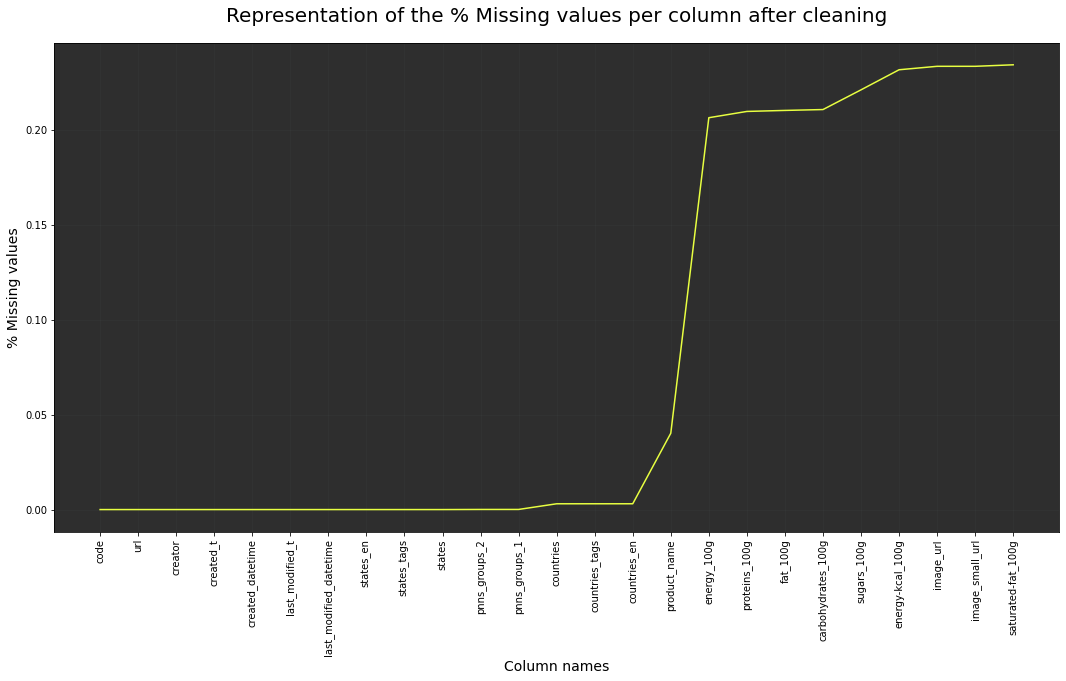

In [10]:
# data visualization for missing values of our dataframe called missing_data

to_plot = missing_data2.sort_values(by=['% Missing values'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Representation of the % Missing values per column after cleaning', fontsize=20, y=1.03)
plt.xlabel('Column names', fontsize=14)
plt.ylabel('% Missing values', fontsize=14)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot['Column variable'],to_plot['% Missing values'],color="#E8FF41"); 

# Check for entire rows with NaN values

We notice that we don't have any rows in our dataframe that have missing values for each column.

In [11]:
miss_rows=data[data.isnull().all(axis=1)]

print('Number of rows with entire NaN values is:', len(miss_rows))



Number of rows with entire NaN values is: 0


# Treating Missing 'product_name' Values 

In our *missing_data2*, we notice that an important number of values is missing in the column named **product_name** and it seems complicated to define our application without the name of the product we're working with. 
We decide to drop the rows that have a missing value on the **product_name** column.  

In [12]:
drop_data = data.dropna(axis=0, how='any', subset=['product_name'], inplace=False)

missing_data3 = pd.DataFrame()
missing_data3['Column variable'] = drop_data.columns
missing_data3['Data type'] = list(drop_data.dtypes)
missing_data3['Missing values count'] = list(drop_data.isna().sum())
missing_data3['% Missing values'] = list(drop_data.isna().sum()/(len(drop_data))) 
print(missing_data3)

           Column variable Data type  Missing values count  % Missing values
0                     code    object                     0          0.000000
1                      url    object                     0          0.000000
2                  creator    object                     0          0.000000
3                created_t     int64                     0          0.000000
4         created_datetime    object                     0          0.000000
5          last_modified_t     int64                     0          0.000000
6   last_modified_datetime    object                     0          0.000000
7             product_name    object                     0          0.000000
8                countries    object                   427          0.002197
9           countries_tags    object                   428          0.002202
10            countries_en    object                   428          0.002202
11           pnns_groups_1    object                     1          0.000005

# Duplicated 'product_name' Values Observations

For us, this step is an observation to know how many duplicated values we can find in the column **product_name** so we know we can keep this information for later in case we need it. 

To do so, we're going to create two dataframes:
* Our dataframe **check** is going to return boolean values for each *product_name* to locate if the value got a duplicate in the same column. **True** if a duplicate value exist and **False** if not.
* The next step is about determining the number of duplicate values across the *product_name* column for each cell. In two steps, we firstly create a dataframe called **dups** that contain all the duplicated value from *product_name* in our **check** dataframe. Secondly, we create another dataframe named **count_dups** that we sort by **product_name** and by descending order, that is going to contain the count of duplicated value for each **product_name**.

In [13]:
check = pd.DataFrame(drop_data['product_name'].duplicated()) # return a dataframe of boolean containing the column product_name and a second column True or False
check = check.set_index(drop_data['product_name']).set_axis(['Duplicated count'], axis='columns') # change the index to the product name to know what products we are talking about
# returns True which means that there are product_name that are duplicated
check.head(10)

,Duplicated count
product_name,
truffes fantaisie,False
Seasoning salt indian,False
Chips artisanales,False
Maple jarabe sabor,False
Boeuf hongroise + pates,False
Cocktail Ananas goyave,False
Paprika edelste (UBENA),False
yakasobi,False
Céleri,False


In [14]:
dups = check[check['Duplicated count'] == True]
count_dups = dups.groupby(['product_name'], sort=True).count().sort_values(by=['Duplicated count'], axis=0, ascending=False)
print(count_dups)

                              Duplicated count
product_name                                  
Aceite de oliva virgen extra               140
Miel                                       128
Filet de poulet                            102
Comté                                       90
Chocolat                                    81
...                                        ...
Iron                                         1
Isey skyr                                    1
Iso                                          1
Isolate protein                              1
ป๊อกกี้ ช็อกโกแลต แบบซอง                     1

[12824 rows x 1 columns]


# Entire NaN Rows for Quantitative Variables

A step further in our row cleaning, we want to delete the rows that contain only NaN values on the quantitative variables because we won't make much of an application with no quantitative values. 
To do so, we proceed with two dataframes again:
* First, we create a dataframe called **mask** and using the operations *.loc* to locate the columns that interest us, *.isnull()* to target only the missing values on those columns and *.sum()* with the condition that NaN values appear on respectively all our columns, we gather all the rows with missing values on the quantitative variables into it. 
* Then, we create our last clean dataframe called **drop_data_nan** that is a combination of **drop_data** - our original dataframe with the clean columns - and **mask** using the *.append()* operation. Using *.drop_duplicates()* and keeping the option *keep=False* we delete all the duplicates values, which allows us to delete all the rows with NaN that we previously gathered in our **mask** dataframe because they obviously are contained in **drop_data** as well.  

In [15]:
mask = drop_data[drop_data.loc[:,['energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g']].isnull().sum(axis=1) == 9]
# mask contains all the rows with NaN values on the quantitative variables

In [16]:
drop_data_nan = drop_data.append(mask).drop_duplicates(keep=False)
drop_data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194341 entries, 947309 to 878874
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   code                    194341 non-null  object 
 1   url                     194341 non-null  object 
 2   creator                 194341 non-null  object 
 3   created_t               194341 non-null  int64  
 4   created_datetime        194341 non-null  object 
 5   last_modified_t         194341 non-null  int64  
 6   last_modified_datetime  194341 non-null  object 
 7   product_name            194341 non-null  object 
 8   countries               193914 non-null  object 
 9   countries_tags          193913 non-null  object 
 10  countries_en            193913 non-null  object 
 11  pnns_groups_1           194340 non-null  object 
 12  pnns_groups_2           194341 non-null  object 
 13  states                  194341 non-null  object 
 14  states_tags    

In [17]:
import os
os.chdir(r'./')
drop_data_nan.to_csv('clean_p2.csv',sep = '\t',index = True)

In [18]:
from IPython.display import FileLink
FileLink(r'clean_p2.csv')

/kaggle/working/clean_p2.csv